In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
x = np.arange(0, math.pi*2, 0.05)
y = np.sin(x)
plt.plot(x,y)
plt.xlabel("angle")
plt.ylabel("sine")
plt.title('sine wave')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
# plot a line, implicitly creating a subplot(111)
plt.plot([1,2,3])
# now create a subplot which represents the top plot of a grid with 2 rows and 1 column.
#Since this subplot will overlap the first, the plot (and its axes) previously 
plt.subplot(211)
plt.plot(range(12))
plt.subplot(212, facecolor='y') # creates 2nd subplot with yellow background
plt.plot(range(12))

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot([1,2,3])
ax2 = fig.add_subplot(221, facecolor='y')
ax2.plot([1,2,3])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
x = np.arange(0, math.pi*2, 0.05)
fig=plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.55, 0.55, 0.3, 0.3]) # inset axes
y = np.sin(x)
axes1.plot(x, y, 'b')
axes2.plot(x,np.cos(x),'r')
axes1.set_title('sine')
axes2.set_title("cosine")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(2,2)
import numpy as np
x = np.arange(1,5)
a[0][0].plot(x,x*x)
a[0][0].set_title('square')
a[0][1].plot(x,np.sqrt(x))
a[0][1].set_title('square root')
a[1][0].plot(x,np.exp(x))
a[1][0].set_title('exp')
a[1][1].plot(x,np.log10(x))
a[1][1].set_title('log')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(1,3, figsize = (12,4))
x = np.arange(1,11)
axes[0].plot(x, x**3, 'g',lw=2)
axes[0].grid(True)
axes[0].set_title('default grid')
axes[1].plot(x, np.exp(x), 'r')
axes[1].grid(color='b', ls = '-.', lw = 0.25)
axes[1].set_title('custom grid')
axes[2].plot(x,x)
axes[2].set_title('no grid')
fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
a1 = plt.subplot2grid((3,3),(0,0),colspan = 2)
a2 = plt.subplot2grid((3,3),(0,2), rowspan = 3)
a3 = plt.subplot2grid((3,3),(1,0),rowspan = 2, colspan = 2)
import numpy as np
x = np.arange(1,10)
a2.plot(x, x*x)
a2.set_title('square')
a1.plot(x, np.exp(x))
a1.set_title('exp')
a3.plot(x, np.log(x))
a3.set_title('log')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(1, 2, figsize=(10,4))
x = np.arange(1,5)
axes[0].plot( x, np.exp(x))
axes[0].plot(x,x**2)
axes[0].set_title("Normal scale")
axes[1].plot (x, np.exp(x))
axes[1].plot(x, x**2)
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)")
axes[0].set_xlabel("x axis")
axes[0].set_ylabel("y axis")
axes[0].xaxis.labelpad = 10
axes[1].set_xlabel("x axis")
axes[1].set_ylabel("y axis")
plt.show()

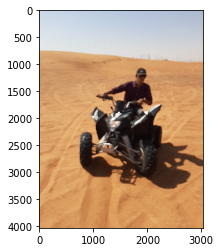

In [25]:
# Convolution

from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2
import imutils
import matplotlib.pyplot as plt

def convolve(image, kernel):
    # Get the dimensions of the image and kernel
    (img_h, img_w) = image.shape[:2]
    (ker_h, ker_w) = kernel.shape[:2]

    # Allocate memory of the output image, ensuring to 'pad' the borders of the input image so the spacial size
    # (i.e. width and height) are not reduced
    pad = (ker_w - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros((img_h, img_w), dtype='float')

    # Loop over the input image, 'sliding' the kernel across each (x, y) coordinate from left-to-right and
    # top-to-bottom
    for y in np.arange(pad, img_h + pad):
        for x in np.arange(pad, img_w + pad):
            # Extract the ROI of the image by extracting the 'center' region of the current (x, y) coordinates
            # dimensions
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

            # Perform the actual convolution
            k = (roi * kernel).sum()

            # Store the convolved value in the (x, y) coordinate of the output image
            output[y - pad, x - pad] = k

    # Rescale the output image to be in the range [0, 255]
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype('uint8')

    # Return the output image
    return output

# Construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument('-i', '--image', required=True,
#                 help='Path to the input image')
# args = vars(ap.parse_args())

args = {'image':'deblur.jpg'}

# Construct average blurring kernels used to smooth an image
small_blur = np.ones((7, 7), dtype='float') * (1.0 / (7 * 7))
large_blur = np.ones((21, 21), dtype='float') * (1.0 / (21 * 21))

# Construct a sharpening filter
sharpen = np.array(([0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]), dtype='float')

# Construct the Laplacian kernel used to detect edge-like regions of an image
laplacian = np.array(([0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]), dtype='int')

# Construct the Sobel x-axis kernel
sobel_x = np.array(([-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]), dtype='int')

# Construct the Sobel y-axis kernel
sobel_y = np.array(([-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]), dtype='int')

# Construct an emboss kernel
emboss = np.array(([-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]), dtype='int')


# Construct a kernel bank, a list of kernels to be applied using out custom 'convolve' function and OpenCV's
# 'filter2D' function
# kernel_bank = (('small_blur', small_blur),
#                ('large_blur', large_blur),
#                ('sharpen', sharpen),
#                ('laplacian', laplacian),
#                ('sobel_x', sobel_x),
#                ('sobel_y', sobel_y),
#                ('emboss', emboss))

# kernel_bank = (('sharpen',sharpen), ('laplacian', laplacian))
# Load the image and convert it to greyscale
image = cv2.imread(args['image'])
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# grey = imutils.resize(grey, width=200)
plt.imshow(img_rgb)

# # Loop over the kernels
# for (kernel_name, kernel) in kernel_bank:
#     # Apply the kernel to the greyscale image using both 'convolve' functions
#     print('[INFO]: Applying {} kernel'.format(kernel_name))
#     convolve_output = convolve(grey, kernel)
#     opencv_output = cv2.filter2D(grey, -1, kernel)

#     # Show the output image
#     display(plt.imshow(grey))
#     display(plt.imshow(convolve_output))
#     display(plt.imshow(opencv_output))

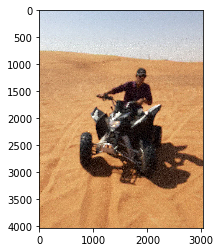

In [16]:

sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(img_rgb, -1, sharpen_kernel)

plt.imshow(sharpen)

In [ ]:
# import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline
img = cv2.imread('deblur.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def load_my_image(fname = 'deblur.jpg'):
    '''returns array containing greyscale values for supplied file (at thumbnail size)'''
    image_color = Image.open(fname).resize((90, 125), Image.ANTIALIAS)
    image_grayscale = image_color.convert('L')
    image_array = np.asarray(image_grayscale)
    return(image_array)

def apply_conv_locally(conv, image_section):
    '''Returns output of applying conv to image_section. Both inputs are numpy arrays.
    image_section is assumed to be same size/shape as conv.
    '''
    out = (conv * image_section).sum()
    return out

def print_hints(conv):
    '''Simple tests on conv array. Prints advice to output. Unique to this exercise'''
    try:
        conv_array = np.array(conv)
    except:
        print("The supplied convolution could not be converted to an array."
              "Is it a nested list containing only numbers? Each sublist "
              " should contain only numbers and have same length")
    assert(conv_array.ndim == 2), "Convolution was " + str(conv_array.ndim) + " dimensions. Should be 2."
    if (conv_array >= 0).all():
        print("All items in the convolutional array were either 0 or positive. This is MIGHT work "
             "but it tends to find bright spots rather than edges/lines. There is a better solution.")
    elif (conv_array <= 0).all():
        print("All items in the convolutional array were either 0 or negative. This is MIGHT work "
             "but it tends to find dark spots rather than edges/lines. There is a better solution.")
    elif (conv_array == 0).all():
        print("All items in the convolutional array were 0.  Try non-zero numbers to capture patterns in the image")
    elif (conv_array[0,0] == conv_array[1,0]) and (conv_array[0,1] == conv_array[1,1]):
        # we've already filtered cases where first column and second column have same sign
        print("Congrats.  That did it.")

def scale_for_display(image):
    '''Scales numpy array containing image data to be integers in range [0, 256]'''
    out = image - image.min()
    out = (out / out.max() * 256)
    return out.astype(int)


def apply_conv_to_image(conv, image):
    '''Applies conv (supplied as list of lists) to image (supplied as numpy array). Returns output array'''
    assert(type(image) == np.ndarray)
    print("----------------------------")
    print("Filter: ")
    print(np.array(conv))
    print_hints(conv)
    image_height, image_width = image.shape
    conv_array = np.array(conv)
    conv_height, conv_width = conv_array.shape
    filtered_image_height = image.shape[0] - conv_height + 1
    filtered_image_width = image.shape[1] - conv_width + 1
    filtered_image = np.zeros((filtered_image_height, filtered_image_width))
    for i in range(filtered_image_height):
        for j in range(filtered_image_width):
            filtered_image[i, j] = apply_conv_locally(conv_array, image[i:i+conv_height, j:j+conv_width])
    return(filtered_image)

def show(image, scale_before_display=True):
    '''Displays numpy array as image.  Scale_before_display ensures values are integers in [0, 256]'''
    if scale_before_display:
        to_display = scale_for_display(image)
    else:
        to_display = image
    plt.imshow(to_display, cmap='gray')
    plt.axis('off')
    plt.show()


from IPython.display import Image, display

def visualize_results(images_paths, most_likely_labels):
	for i, img_path in enumerate(image_paths):
		display(Image(img_path))
		print(most_likely_labels[i])


In [13]:
# https://www.wikiwand.com/en/Unsharp_masking